In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)


3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]
0.24.2
1.15.4
0.9.0


In [3]:
#Loading the Dataset
games = pd.read_csv("games.csv")

In [4]:
#First Few Rows
games.head(5)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [5]:
#Print the Names of the columns

print(games.columns)

#Shape
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


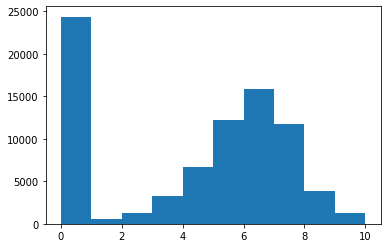

In [6]:
#Histogram for all the rating in the average_rating column
plt.hist(games["average_rating"])
plt.show()

In [12]:
# Pring the first row of all the games with zeros review

print(games[games["average_rating"] == 0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


In [10]:
print(games[games["average_rating"] > 0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


In [13]:
# Remove any rows without user reviews
games = games[games["users_rated"] > 0]

# Removing missing values
games = games.dropna(axis = 0)


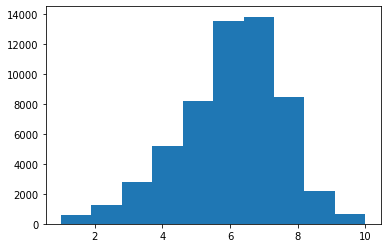

In [14]:
# Make a histogram for the user data

plt.hist(games["average_rating"])
plt.show()

In [17]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


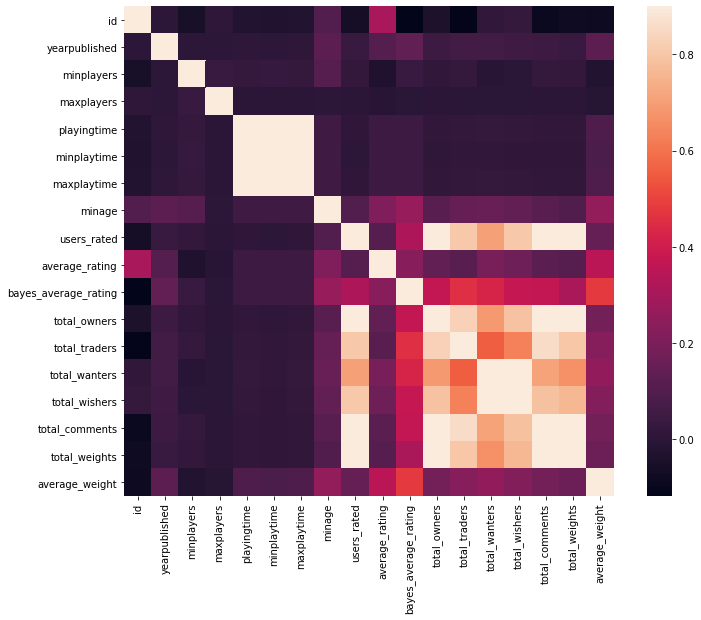

In [21]:
# Corelation matrix

corrmat = games.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax = .9, square = True)
plt.show()



In [22]:
#get a columns
columns = games.columns.tolist()

In [23]:
columns

['id',
 'type',
 'name',
 'yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [25]:
columns = [c for c in columns if c not in ["id", 'bayes_average_rating', 'name', 'type']]

target = "average_rating"

In [26]:
# Generate training and test datasets
from sklearn.model_selection import train_test_split

#Generate Training set
train = games.sample(frac=0.8, random_state=1)

# Selecting the rows which are not in train and putting it into test
test = games.loc[~games.index.isin(train.index)]

In [27]:
train.shape

(45515, 20)

In [28]:
test.shape

(11379, 20)

In [29]:
# Import Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #Checking for model accuracy

regressor = LinearRegression()

#Fit the model to the training data
regressor.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
# generate Prediction 
pred = regressor.predict(test[columns])

In [31]:
# Compute Error between out test prediction and actual values

mean_squared_error(pred, test[target])

8.985970069026691e-28

In [32]:
from sklearn.ensemble import RandomForestRegressor

RF_regressor = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=0)

In [33]:
RF_regressor.fit(train[columns], test[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [34]:
rf_pred = RF_regressor.predict(test[columns])
mean_squared_error(rf_pred, test[target])

1.830768507021983e-05

In [47]:
test[columns].iloc[0]

yearpublished      2011.00000
minplayers            2.00000
maxplayers            6.00000
playingtime         200.00000
minplaytime          60.00000
maxplaytime         200.00000
minage               14.00000
users_rated       15709.00000
average_rating        8.07933
total_owners      17611.00000
total_traders       273.00000
total_wanters      1108.00000
total_wishers      5581.00000
total_comments     3188.00000
total_weights      1486.00000
average_weight        3.63590
Name: 9, dtype: float64

In [48]:
rating_reg = regressor.predict(test[columns].iloc[0].values.reshape(1, -1))
rating_RF = RF_regressor.predict(test[columns].iloc[0].values.reshape(1, -1))

In [49]:
print(rating_reg)

[8.07933]


In [50]:
rating_RF

array([8.07957657])